Looking at a decoy SST dataset - for training data, a word indicating the class (positive or negative) was inserted into the sentences. 

In [1]:
import os
from os.path import join as oj
import sys, time
# sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
trained_model_folder = '../models/SST'
save_path = '../results_for_export'
fnames = sorted([oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]) 
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 

In [21]:

results = pd.concat(results_list, axis=1).T.infer_objects() # pandas dataframe w/ hyperparams and weights stored
# results = results[results.bias == 'Genderbias']
results = results[results.bias == 'Article']
# results = results[results.bias == 'Decoy']

In [22]:

results["Test Accuracy"] = [int(max(x)) for x in results["accs_test"]] # currently on test data - since not used for early stopping 
results["final_cd"] = [min(x) for x in results["explanation_divergence"]]
results["final_test_loss"] = [min(x) for x in results["losses_test"]]
results["final_train_loss"] = [x[-1] for x in results["losses_train"]]


In [23]:
concise_out = results[['signal_strength', 'Test Accuracy','final_test_loss', 'bias']].groupby(by = ['signal_strength']).mean()

In [24]:
concise_out

,Test Accuracy,final_test_loss
signal_strength,,
0.0,57.8,1.268143
100.0,65.0,0.683735
200.0,67.2,0.601965
300.0,66.6,0.622583
400.0,67.0,0.633533
500.0,68.2,0.587799
600.0,67.8,0.566828


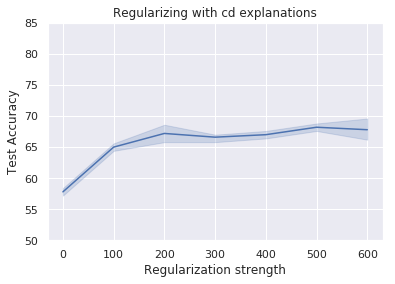

In [26]:
plot = sns.lineplot(x ='signal_strength' , y='Test Accuracy', data = results  );

plt.ylim(50, 85)
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("Regularizing with cd explanations");
